# ⚛️ H₂ QITE — **Noiseless** (Pure Package Client)

This notebook runs **VarQITE (McLachlan's variational principle)** for **H₂**
using only the packaged API:

```python
from qite.core import run_qite
```

It mirrors the VQE/QPE notebook ergonomics:
- **Cached** runs saved to `results/qite/`
- **Plots** saved to `images/qite/`

---

## What we compute

- Molecule: **H₂** (STO-3G, equilibrium registry geometry)
- Ansatz: **UCCSD** (reusing the VQE ansatz library)
- Update rule: **VarQITE (McLachlan)** (statevector / noiseless)
- Device: `default.qubit`

Outputs (from `run_qite`):
- `energy` (final energy)
- `energies` (convergence trace)
- `final_state_real`, `final_state_imag`
- `num_qubits`

## 🔧 Imports & Configuration

In [1]:
from qite.core import run_qite
from qite.io_utils import ensure_dirs

ensure_dirs()

molecule = "H2"
seed = 0

ansatz_name = "UCCSD"
mapping = "jordan_wigner"

steps = 100
dtau = 0.2

print("Molecule:", molecule)
print("Ansatz:", ansatz_name)
print("Mapping:", mapping)
print("Steps:", steps)
print("dtau:", dtau)
print("Seed:", seed)

Molecule: H2
Ansatz: UCCSD
Mapping: jordan_wigner
Steps: 100
dtau: 0.2
Seed: 0


## 🚀 Run VarQITE (Cached)

Note:
If you previously ran this notebook before VarQITE was implemented, you may
have cached results from a temporary fallback. The first run below uses
`force=True` to ensure we compute a fresh VarQITE result.


⚙️ Using VarQITE (McLachlan) update rule
Iter 01/100: E = 0.713474 Ha
Iter 02/100: E = 0.713347 Ha
Iter 03/100: E = 0.713155 Ha
Iter 04/100: E = 0.712862 Ha
Iter 05/100: E = 0.712414 Ha
Iter 06/100: E = 0.711725 Ha
Iter 07/100: E = 0.710662 Ha
Iter 08/100: E = 0.709021 Ha
Iter 09/100: E = 0.706485 Ha
Iter 10/100: E = 0.702565 Ha
Iter 11/100: E = 0.696516 Ha
Iter 12/100: E = 0.687208 Ha
Iter 13/100: E = 0.672963 Ha
Iter 14/100: E = 0.651350 Ha
Iter 15/100: E = 0.619002 Ha
Iter 16/100: E = 0.571578 Ha
Iter 17/100: E = 0.504143 Ha
Iter 18/100: E = 0.412330 Ha
Iter 19/100: E = 0.294481 Ha
Iter 20/100: E = 0.154197 Ha
Iter 21/100: E = 0.001887 Ha
Iter 22/100: E = -0.146156 Ha
Iter 23/100: E = -0.272779 Ha
Iter 24/100: E = -0.368098 Ha
Iter 25/100: E = -0.432766 Ha
Iter 26/100: E = -0.473589 Ha
Iter 27/100: E = -0.498212 Ha
Iter 28/100: E = -0.512667 Ha
Iter 29/100: E = -0.521025 Ha
Iter 30/100: E = -0.525819 Ha
Iter 31/100: E = -0.528561 Ha
Iter 32/100: E = -0.530130 Ha
Iter 33/100: E = -0

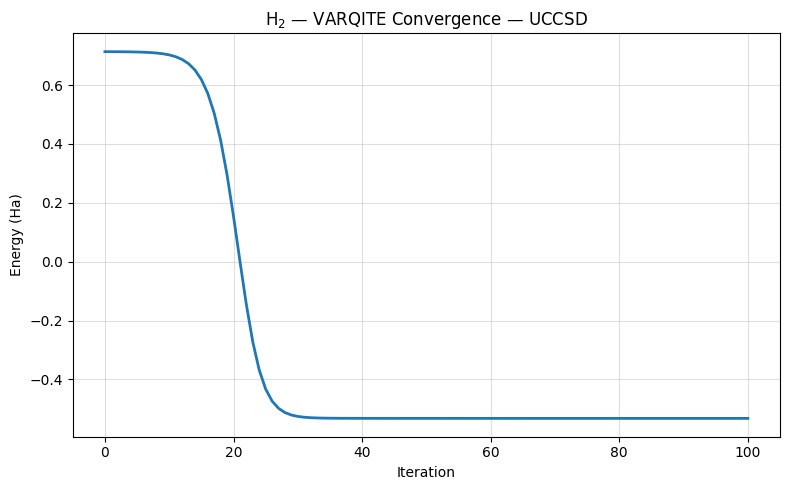

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/qite/H2/convergence_UCCSD_s0.png

💾 Saved run record to /workspaces/Variational_Quantum_Eigensolver/results/qite/qite__H2__UCCSD__jordan_wigner__noiseless__steps100__dtau0.2__s0__611f637a8468.json



{'energy': -0.5324779959080629,
 'energies': [0.7135586467429865,
  0.7134742383895142,
  0.7133473750434611,
  0.7131552294583534,
  0.7128623981268227,
  0.7124139338480678,
  0.7117245430428912,
  0.7106618876915092,
  0.7090209010072561,
  0.7064845898819914,
  0.702564963361668,
  0.6965158124235991,
  0.6872082354307166,
  0.6729632097687318,
  0.6513503746226067,
  0.6190023262574865,
  0.5715781644282679,
  0.5041426643396687,
  0.41233015990713207,
  0.29448125992697055,
  0.15419653406206082,
  0.0018866438217923776,
  -0.14615646882293368,
  -0.2727785249403102,
  -0.3680979194401618,
  -0.43276611291579975,
  -0.4735885285208551,
  -0.4982121416745211,
  -0.5126674984160784,
  -0.5210247051903122,
  -0.5258186854395903,
  -0.5285607368750463,
  -0.5301303650942625,
  -0.5310325997265728,
  -0.5315553320776742,
  -0.5318620555477256,
  -0.5320454649754076,
  -0.532158103182349,
  -0.5322297809130072,
  -0.5322774471686335,
  -0.5323107727448138,
  -0.532335306564331,
  -0.53

In [ ]:
result = run_qite(
    molecule=molecule,
    seed=int(seed),
    steps=int(steps),
    dtau=float(dtau),
    ansatz_name=str(ansatz_name),
    mapping=str(mapping),
    noisy=False,
    plot=True,
    force=False,
    show=True,
)

result

## 📌 Summary

In [3]:
print("\nH₂ VarQITE — Noiseless Summary\n")

E0 = float(result["energies"][0])
E_last = float(result["energies"][-1])
n_qubits = int(result["num_qubits"])

print(f"Num qubits:        {n_qubits}")
print(f"Initial energy:    {E0:.8f} Ha")
print(f"Final energy:      {E_last:.8f} Ha")
print(f"ΔE (final-init):   {E_last - E0:+.8f} Ha")

# Optional quick sanity check (ballpark; depends on exact geometry details)
E_ref = -1.137
print(f"Reference (ballpark): {E_ref:.3f} Ha")
print(f"ΔE (final-ref):       {E_last - E_ref:+.6f} Ha")


H₂ VarQITE — Noiseless Summary

Num qubits:        4
Initial energy:    0.71355865 Ha
Final energy:      -0.53247800 Ha
ΔE (final-init):   -1.24603664 Ha
Reference (ballpark): -1.137 Ha
ΔE (final-ref):       +0.604522 Ha


## 🔁 Noiseless dtau sweep

Each run is cached independently. After the one forced run above, the sweep
can use `force=False`.

In [4]:
dtau_list = [0.05, 0.1, 0.2, 0.3]
energies = []

for dt in dtau_list:
    r = run_qite(
        molecule=molecule,
        seed=int(seed),
        steps=int(steps),
        dtau=float(dt),
        ansatz_name=str(ansatz_name),
        mapping=str(mapping),
        noisy=False,
        plot=False,
        force=False,
        show=False,
    )
    energies.append(float(r["energy"]))

print("\nEnergy vs dtau (noiseless)\n")
for dt, E in zip(dtau_list, energies):
    print(f"dtau={dt:>4.2f}  E={E: .8f} Ha")


📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/qite/qite__H2__UCCSD__jordan_wigner__noiseless__steps100__dtau0.05__s0__140f8d29072f.json

⚙️ Using VarQITE (McLachlan) update rule
Iter 01/100: E = 0.713519 Ha
Iter 02/100: E = 0.713469 Ha
Iter 03/100: E = 0.713407 Ha
Iter 04/100: E = 0.713331 Ha
Iter 05/100: E = 0.713236 Ha
Iter 06/100: E = 0.713117 Ha
Iter 07/100: E = 0.712968 Ha
Iter 08/100: E = 0.712782 Ha
Iter 09/100: E = 0.712549 Ha
Iter 10/100: E = 0.712257 Ha
Iter 11/100: E = 0.711889 Ha
Iter 12/100: E = 0.711428 Ha
Iter 13/100: E = 0.710848 Ha
Iter 14/100: E = 0.710118 Ha
Iter 15/100: E = 0.709200 Ha
Iter 16/100: E = 0.708045 Ha
Iter 17/100: E = 0.706591 Ha
Iter 18/100: E = 0.704761 Ha
Iter 19/100: E = 0.702459 Ha
Iter 20/100: E = 0.699565 Ha
Iter 21/100: E = 0.695929 Ha
Iter 22/100: E = 0.691366 Ha
Iter 23/100: E = 0.685648 Ha
Iter 24/100: E = 0.678495 Ha
Iter 25/100: E = 0.669568 Ha
Iter 26/100: E = 0.658462 Ha
Iter 27/100: E = 0.644698 Ha
Iter 28/1